# Demonstration of API using OpenWeather.org
This demonstration is heavily inspired by [NeuralNine's video](https://www.youtube.com/watch?v=9P5MY_2i7K8).  
The VS Code extensino _JSON viewer_ is recommended for viewing downloaded JSON content.

In [1]:
# Imports
import datetime as dt
import requests
import json

## Common definitions to use for all requests
### Current weather

In [2]:
BASE_URL = "http://api.openweathermap.org/data/2.5/weather?"
API_KEY = open('../../../No_sync/api_key_OpenWeather','r').read()
CITY = "Ski"

url = BASE_URL + "q=" + CITY + "&appid=" + API_KEY

## Request current weather in chosen city

In [3]:
response = requests.get(url).json()
# print(response)

In [4]:
# Write JSON to file for viewing
with open('downloads/weather.json', 'w') as f:
    json.dump(response, f, indent=4)

## Conversion functions

In [5]:
# Kelvin to Celsius
def kelvin_to_celsius(temp):
    return temp - 273.15

# Meters per second to knots
def mps_to_knots(speed):
    return speed * 1.943844

## Print some weather properties

In [6]:
# Current temperature
temp_kelvin = response['main']['temp']
temp_celsius = kelvin_to_celsius(temp_kelvin)
print(f"The current temperature in {CITY} is {temp_celsius:.2f}°C")

The current temperature in Ski is 21.00°C


In [7]:
# Sunrise and sunset today in local time
sunrise = dt.datetime.fromtimestamp(response['sys']['sunrise'])
sunset = dt.datetime.fromtimestamp(response['sys']['sunset'])
print(f"Sunrise today is at {sunrise:%H:%M} and sunset is at {sunset:%H:%M}")

Sunrise today is at 05:38 and sunset is at 21:03


## Common definitions to use for all requests
### Forecasted weather

In [8]:
BASE_URL = "http://api.openweathermap.org/data/2.5/forecast?"
CITY = "Ski"

urlF = BASE_URL + "q=" + CITY + "&appid=" + API_KEY

## Request current weather in chosen city

In [9]:
responseF = requests.get(urlF).json()
print(responseF)

{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1692370800, 'main': {'temp': 294.15, 'feels_like': 293.87, 'temp_min': 293.61, 'temp_max': 294.15, 'pressure': 1026, 'sea_level': 1026, 'grnd_level': 1010, 'humidity': 60, 'temp_kf': 0.54}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'clouds': {'all': 76}, 'wind': {'speed': 3.63, 'deg': 71, 'gust': 5.15}, 'visibility': 10000, 'pop': 0.03, 'sys': {'pod': 'd'}, 'dt_txt': '2023-08-18 15:00:00'}, {'dt': 1692381600, 'main': {'temp': 292.96, 'feels_like': 292.64, 'temp_min': 290.58, 'temp_max': 292.96, 'pressure': 1026, 'sea_level': 1026, 'grnd_level': 1009, 'humidity': 63, 'temp_kf': 2.38}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'clouds': {'all': 75}, 'wind': {'speed': 1.87, 'deg': 39, 'gust': 4.91}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2023-08-18 18:00:00'}, {'dt': 1692392400, 'main': {'temp': 290.9, 'feels_like

In [10]:
# Write JSON to file for viewing
with open('downloads/forecast.json', 'w') as f:
    json.dump(responseF, f, indent=4)

### When and what?
Check contents and time stamps

In [11]:
# Content of responseF
responseF.keys()

dict_keys(['cod', 'message', 'cnt', 'list', 'city'])

In [12]:
# Number of forecasts
print(len(responseF["list"]))

40


In [13]:
# Print forecast times
for forecast in responseF["list"]:
    print(forecast["dt_txt"])

2023-08-18 15:00:00
2023-08-18 18:00:00
2023-08-18 21:00:00
2023-08-19 00:00:00
2023-08-19 03:00:00
2023-08-19 06:00:00
2023-08-19 09:00:00
2023-08-19 12:00:00
2023-08-19 15:00:00
2023-08-19 18:00:00
2023-08-19 21:00:00
2023-08-20 00:00:00
2023-08-20 03:00:00
2023-08-20 06:00:00
2023-08-20 09:00:00
2023-08-20 12:00:00
2023-08-20 15:00:00
2023-08-20 18:00:00
2023-08-20 21:00:00
2023-08-21 00:00:00
2023-08-21 03:00:00
2023-08-21 06:00:00
2023-08-21 09:00:00
2023-08-21 12:00:00
2023-08-21 15:00:00
2023-08-21 18:00:00
2023-08-21 21:00:00
2023-08-22 00:00:00
2023-08-22 03:00:00
2023-08-22 06:00:00
2023-08-22 09:00:00
2023-08-22 12:00:00
2023-08-22 15:00:00
2023-08-22 18:00:00
2023-08-22 21:00:00
2023-08-23 00:00:00
2023-08-23 03:00:00
2023-08-23 06:00:00
2023-08-23 09:00:00
2023-08-23 12:00:00


## Make plots of omnipresent measurements and events

In [14]:
# Air pressure per period
pressures = []
timestamps = []
for forecast in responseF["list"]:
    pressures.append(forecast["main"]["pressure"])
    timestamps.append(dt.datetime.fromtimestamp(forecast["dt"]))

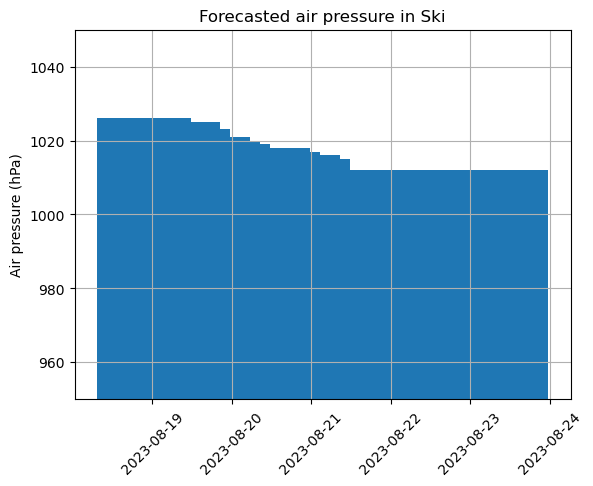

In [15]:
import matplotlib.pyplot as plt
plt.bar(timestamps, pressures)
plt.xticks(rotation=45)
plt.ylim(950, 1050)
plt.grid()
plt.ylabel("Air pressure (hPa)")
plt.title(f"Forecasted air pressure in {CITY}")
plt.show()

In [16]:
rain = []
snow = []
for forecast in responseF["list"]:
    try: # Check if rain is present in forecast
        rain.append(forecast["rain"]["3h"])
    except KeyError:
        rain.append(0)
    try: # Check if snow is present in forecast
        snow.append(forecast["snow"]["3h"])
    except KeyError:
        snow.append(0)

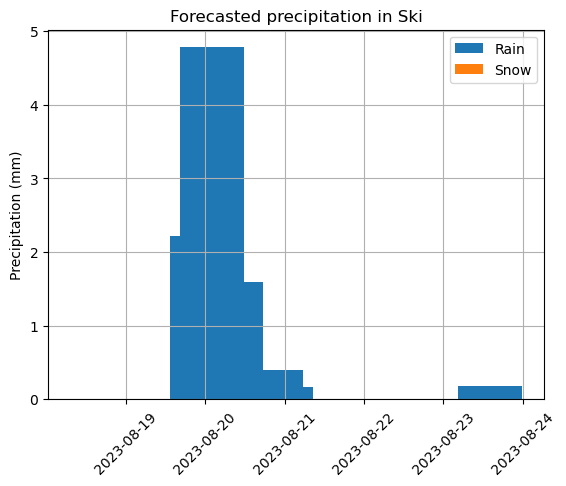

In [17]:
# Stacked bar chart with rain and snow
plt.bar(timestamps, rain, label="Rain")
plt.bar(timestamps, snow, label="Snow")
plt.xticks(rotation=45)
plt.grid()
plt.ylabel("Precipitation (mm)")
plt.title(f"Forecasted precipitation in {CITY}")
plt.legend()
plt.show()


## Resources
- [NeuralNine's video](https://www.youtube.com/watch?v=9P5MY_2i7K8)